## PROJETO ICD
### World Press Freedom Score

#### Participantes:

- CLEYDSON DE SOUZA FERREIRA JUNIOR
- FELIPE GONTIJO SIQUEIRA
- MARIANA DA SILVA MARTINS

#### Perguntas:

1. A média de liberdade aumenta ou diminui conforme a segurança do país?
2. Como o fator econômico influencia o contexto sociocultural e o de segurança?
3. Qual país possui o pior contexto econômico juntamente com menor histórico de abuso?

## Testes

In [83]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


df = pd.read_csv("World Press Freedom Score.csv")
df = df.set_index('Ranking')

df

,Country,Political Context 2022,Economic Context 2022,Legal Framework 2022,Safety Score 2022,Sociocultural Context 2022,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2022,Global Score 2021,Global Score 2020,Global Score 2019
Ranking,,,,,,,,,,,,
1,Norway,94.89,90.38,92.23,92.03,93.71,0.00,6.72,92.65,6.72,7.84,7.82
2,Denmark,94.34,83.67,89.18,92.97,91.17,0.00,8.57,90.27,8.57,8.13,9.87
3,Sweden,91.96,87.66,90.27,84.14,90.18,0.00,7.24,88.84,7.24,9.25,8.31
4,Estonia,91.11,81.97,87.87,93.20,90.00,0.00,15.25,88.83,15.25,12.61,12.27
5,Finland,90.40,82.03,86.64,92.26,90.77,0.00,6.99,88.42,6.99,7.93,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Myanmar,40.40,29.25,20.18,4.63,30.67,0.00,31.12,25.03,31.12,30.20,29.00
177,Turkmenistan,25.00,11.73,29.61,35.69,23.00,55.21,41.86,25.01,43.94,42.88,43.98
178,Iran,34.14,21.32,26.71,13.61,23.78,0.00,29.82,23.22,29.82,29.79,29.67


## Testes:

- Já de início no primeiro teste em relação ao global score e safety score já se percebe uma anomalia, uma vez que, segundo a criadora do data set diz que quando maior o global score pior é a condição relacionada ao tema. Dessa forma, analisando o data set percebe-se que a coluna do Global score 2022 está invertida (x-x). Então, para continuarmos com as nossas analises vamos inverte-la

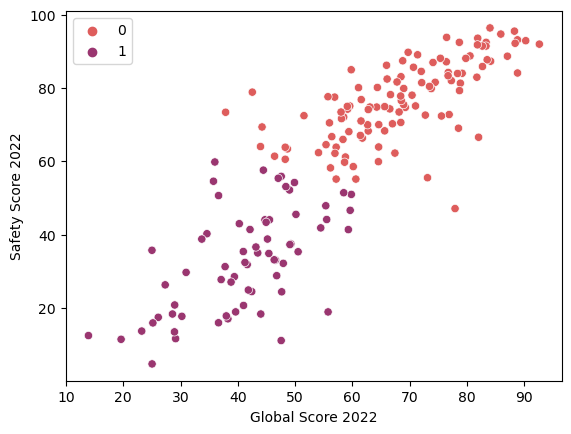

In [144]:
df_group = df[['Safety Score 2022','Global Score 2022']].dropna()

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(df_group)

sns.scatterplot(data = df, x='Global Score 2022', y='Safety Score 2022', hue = kmeans.labels_, palette = 'flare');

### Inversão da coluna 'Global Score 2022'
- A partir de agora trabalharemos com esse dataset

In [5]:
a = df.sort_values('Global Score 2022')

a = a['Global Score 2022'].reset_index()

a = a.drop(columns = 'Ranking')

a.index +=1

df['Global Score 2022'] = a
df

,Country,Political Context 2022,Economic Context 2022,Legal Framework 2022,Safety Score 2022,Sociocultural Context 2022,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2022,Global Score 2021,Global Score 2020,Global Score 2019
Ranking,,,,,,,,,,,,
1,Norway,94.89,90.38,92.23,92.03,93.71,0.00,6.72,13.92,6.72,7.84,7.82
2,Denmark,94.34,83.67,89.18,92.97,91.17,0.00,8.57,19.62,8.57,8.13,9.87
3,Sweden,91.96,87.66,90.27,84.14,90.18,0.00,7.24,23.22,7.24,9.25,8.31
4,Estonia,91.11,81.97,87.87,93.20,90.00,0.00,15.25,25.01,15.25,12.61,12.27
5,Finland,90.40,82.03,86.64,92.26,90.77,0.00,6.99,25.03,6.99,7.93,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Myanmar,40.40,29.25,20.18,4.63,30.67,0.00,31.12,88.42,31.12,30.20,29.00
177,Turkmenistan,25.00,11.73,29.61,35.69,23.00,55.21,41.86,88.83,43.94,42.88,43.98
178,Iran,34.14,21.32,26.71,13.61,23.78,0.00,29.82,88.84,29.82,29.79,29.67


### Testes com os valores corrigidos:

- Após a correção dos valores, podemos observar uma inversão no gráfico, que agora é mais claro e mais preciso, mostrando que quanto menor a porcentagem no global score, maior é a taxa de segurança.

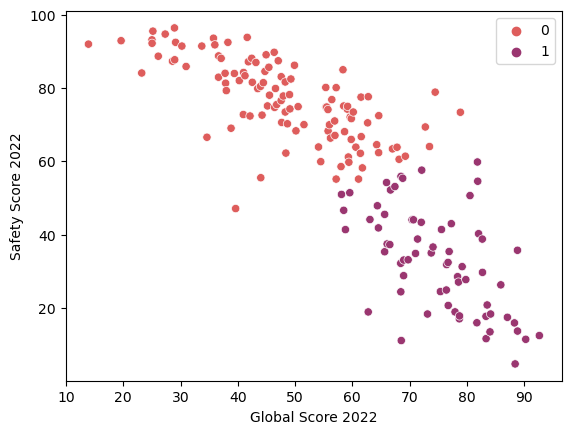

In [6]:
df_group = df[['Safety Score 2022','Global Score 2022']].dropna()

kmeans = KMeans(n_clusters=2)

kmeans.fit(df_group)

sns.scatterplot(data = df, x='Global Score 2022', y='Safety Score 2022', hue = kmeans.labels_, palette = 'flare');

### Função 'optimise_kmeans' 

Criando função 'optimise_kmeans' para otimizar o número de clusters ao longo do notebook

In [105]:
def optimise_kmeans(data, max_k):
    
    means = []
    inertias = []
    
    for k in range(1, max_k):
        
        kmeans = KMeans(n_clusters = k, n_init='auto')
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (7, 4))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

## Political Context 2022 x Legal Framework 2022

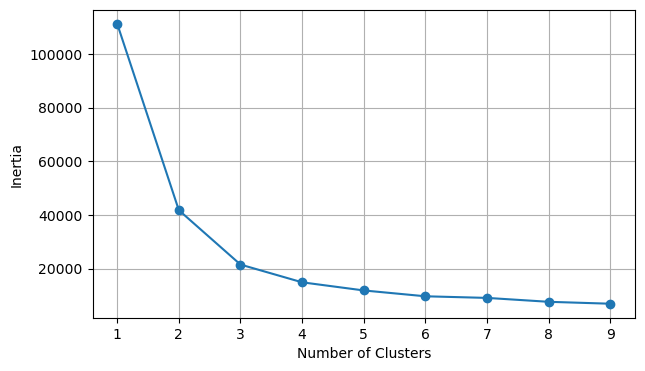

In [106]:
optimise_kmeans(df[['Political Context 2022','Legal Framework 2022']], 10)

In [146]:
# Scatterplot com Clusters 3
kmeans = KMeans(n_clusters = 3, n_init='auto')
kmeans.fit(df[['Political Context 2022','Legal Framework 2022']])
klab1 = kmeans.labels_


# Scatterplot com Clusters 4
kmeans = KMeans(n_clusters = 4, n_init='auto')
kmeans.fit(df[['Political Context 2022','Legal Framework 2022']])
klab2 = kmeans.labels_

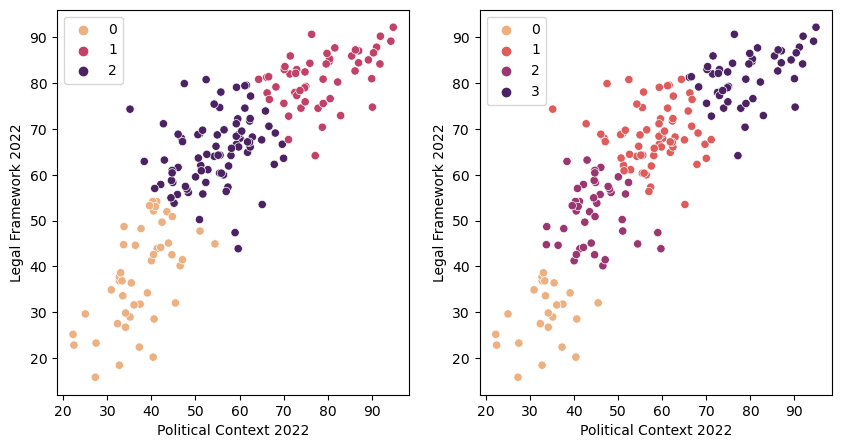

In [147]:
fig, ax = plt.subplots(1, 2, figsize= (10,5))

sns.scatterplot(x= df['Political Context 2022'], y= df['Legal Framework 2022'], hue = klab1, palette = 'flare', ax=ax[0]);
sns.scatterplot(x= df['Political Context 2022'], y= df['Legal Framework 2022'], hue = klab2 , palette = 'flare', ax=ax[1]);

## Economic Context 2022 x Sociocultural Context 2022

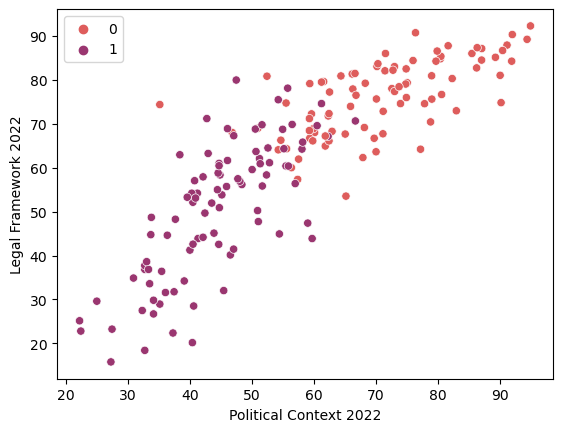

In [137]:
optimise_kmeans(df[['Economic Context 2022','Sociocultural Context 2022']], 10) # número de clusters = 2

kmeans = KMeans(n_clusters = 2, n_init='auto')
kmeans.fit(df[['Economic Context 2022','Sociocultural Context 2022']])
klab = kmeans.labels_

sns.scatterplot(x= df2['Political Context 2022'], y= df2['Legal Framework 2022'], hue = kmeans.labels_ , palette = 'flare');

## Safety Score 2022 x Sociocultural Context 2022

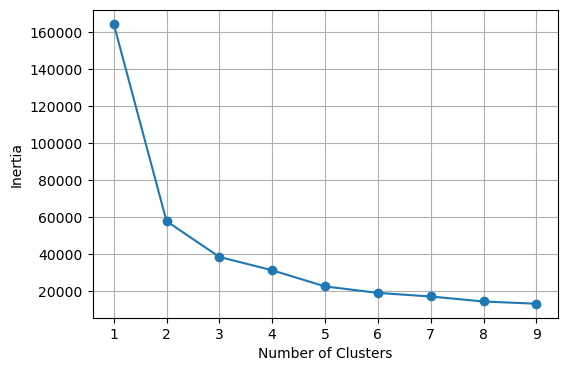

In [97]:
optimise_kmeans(df[['Safety Score 2022','Sociocultural Context 2022']], 10)

In [150]:
# Scatterplot com Clusters 3
kmeans = KMeans(n_clusters = 3, n_init='auto')
kmeans.fit(df[['Safety Score 2022','Sociocultural Context 2022']])
kmeans1 = kmeans.labels_


# Scatterplot com Clusters 4
kmeans = KMeans(n_clusters = 4, n_init='auto')
kmeans.fit(df[['Safety Score 2022','Sociocultural Context 2022']])
kmeans2 = kmeans.labels_


# Scatterplot com Clusters 5
kmeans = KMeans(n_clusters = 5, n_init='auto')
kmeans.fit(df[['Safety Score 2022','Sociocultural Context 2022']])
kmeans3 = kmeans.labels_

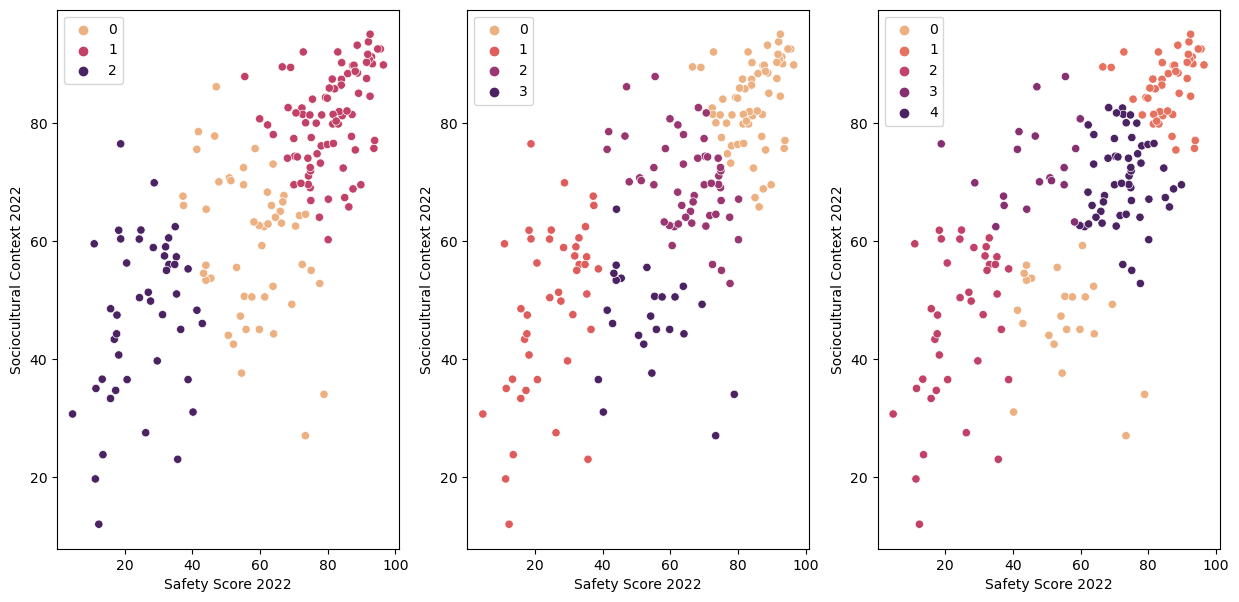

In [158]:
fig, ax = plt.subplots(1, 3, figsize= (15, 7))

sns.scatterplot(x= df['Safety Score 2022'], y= df['Sociocultural Context 2022'], hue = kmeans1, palette = 'flare', ax=ax[0]);
sns.scatterplot(x= df['Safety Score 2022'], y= df['Sociocultural Context 2022'], hue = kmeans2 , palette = 'flare', ax=ax[1]);
sns.scatterplot(x= df['Safety Score 2022'], y= df['Sociocultural Context 2022'], hue = kmeans3 , palette = 'flare', ax=ax[2]);

## Economic Context 2022 x Political Context 2022

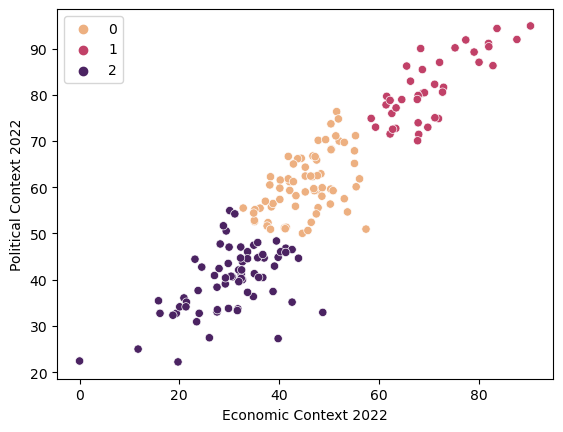

In [100]:
optimise_kmeans(df[['Economic Context 2022','Political Context 2022']], 10) # número de clusters = 3

kmeans = KMeans(n_clusters = 3, n_init='auto')
kmeans.fit(df[['Economic Context 2022','Political Context 2022']])

sns.scatterplot(x= df['Economic Context 2022'], y= df['Political Context 2022'], hue = kmeans.labels_ , palette = 'flare');

## Algum padrão foi detectado?

## Alguma nova pergunta foi descoberta ao analisar os agrupamentos?